In [13]:
import pandas as pd

df = pd.read_csv('restaurant_data.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())



   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

## Data Preprocessing

In [14]:
print(df.columns)



Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price_range', 'Aggregate rating', 'Rating color', 'Rating_text',
       'Votes'],
      dtype='object')


In [15]:
df.columns = df.columns.str.strip()


In [16]:
df = df.dropna(subset=['Aggregate rating'])  # Drop rows where rating is missing
df['Cuisines'] = df['Cuisines'].fillna('Unknown')


## encoding categrial variable

In [17]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Locality', 'Rating_text', 'Cuisines']
encoder = LabelEncoder()
for col in label_cols:
    df[col] = encoder.fit_transform(df[col])


## features selections

In [18]:
features = ['Locality', 'Cuisines', 'Price_range', 'Votes']
target = 'Aggregate rating'
X = df[features]
y = df[target]


## Train - Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Choose and Train a Regression Model

## 1.Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## 2: Decision Tree Regression

In [21]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5)

 ## Model Evaluation

## Use Regression Metrics

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.12547832862555144
R-squared: 0.944871564077215


 ## Interpret the Results

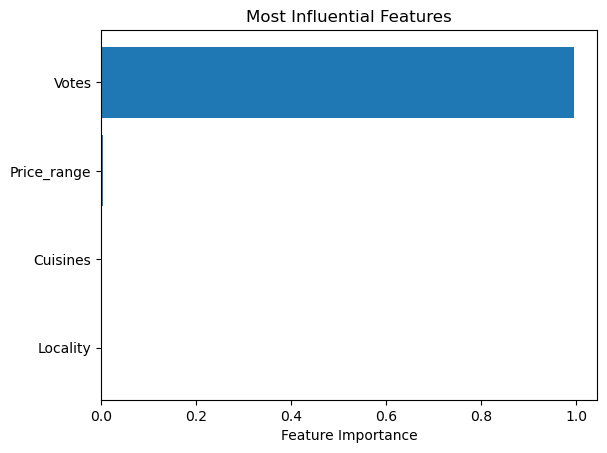

In [23]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Most Influential Features")
plt.show()
